In [33]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

df = pd.read_csv('finance_fraud_prediction_dataset.csv')


In [34]:
parser = lambda x: pd.to_datetime(x, format='%m/%d/%Y')
df = pd.read_csv('finance_fraud_prediction_dataset.csv', parse_dates=['TransactionDate'], date_parser=parser)


In [35]:
df

,TransactionID,Amount,TransactionDate,PaymentType,Country,UserAge,UserEmailVerified,PreviousFraud,MerchantRiskScore,FraudFlag
0,53327,792.74,2022-09-17,Wire Transfer,French Southern Territories,36,True,True,41,False
1,85078,2850.36,2023-03-18,Wire Transfer,Faroe Islands,60,False,False,14,False
2,27142,3296.05,2023-10-21,Wire Transfer,Estonia,53,False,False,9,False
3,76909,2217.85,2022-09-22,Debit Card,Indonesia,53,False,False,21,False
4,32731,4094.37,2020-02-21,Debit Card,Lebanon,40,True,True,56,False
...,...,...,...,...,...,...,...,...,...,...
5995,51365,2065.45,2022-04-01,Credit Card,Norfolk Island,27,True,True,26,False
5996,68247,4283.59,2021-11-14,PayPal,Saint Pierre and Miquelon,53,False,False,20,False
5997,90938,1107.74,2021-07-25,Wire Transfer,Canada,47,False,True,27,False
5998,96835,3338.97,2020-05-25,Wire Transfer,Norway,63,True,True,48,True


In [36]:
df.dtypes

TransactionID                 int64
Amount                      float64
TransactionDate      datetime64[ns]
PaymentType                  object
Country                      object
UserAge                       int64
UserEmailVerified              bool
PreviousFraud                  bool
MerchantRiskScore             int64
FraudFlag                      bool
dtype: object

In [37]:
# Convert boolean columns to numerical (1 for True, 0 for False)
df['UserEmailVerified'] = df['UserEmailVerified'].astype(int)
df['PreviousFraud'] = df['PreviousFraud'].astype(int)
df['FraudFlag'] = df['FraudFlag'].astype(int)

In [38]:
df.dtypes

TransactionID                 int64
Amount                      float64
TransactionDate      datetime64[ns]
PaymentType                  object
Country                      object
UserAge                       int64
UserEmailVerified             int32
PreviousFraud                 int32
MerchantRiskScore             int64
FraudFlag                     int32
dtype: object

In [39]:
df.describe()

,TransactionID,Amount,UserAge,UserEmailVerified,PreviousFraud,MerchantRiskScore,FraudFlag
count,6000.00000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,55555.51700,2455.456820,44.110000,0.493000,0.493000,49.743000,0.196000
std,25571.55154,1452.999062,15.194353,0.499993,0.499993,28.509444,0.397002
min,10001.00000,11.020000,18.000000,0.000000,0.000000,0.000000,0.000000
25%,34329.50000,1207.622500,31.000000,0.000000,0.000000,27.000000,0.000000
50%,55745.00000,2474.845000,44.000000,0.000000,0.000000,48.000000,0.000000
75%,78381.25000,3707.810000,57.000000,1.000000,1.000000,74.000000,0.000000
max,99864.00000,4996.700000,70.000000,1.000000,1.000000,100.000000,1.000000


In [40]:
df.isnull().sum()

TransactionID        0
Amount               0
TransactionDate      0
PaymentType          0
Country              0
UserAge              0
UserEmailVerified    0
PreviousFraud        0
MerchantRiskScore    0
FraudFlag            0
dtype: int64

In [41]:
df['FraudFlag'].value_counts()

0    4824
1    1176
Name: FraudFlag, dtype: int64

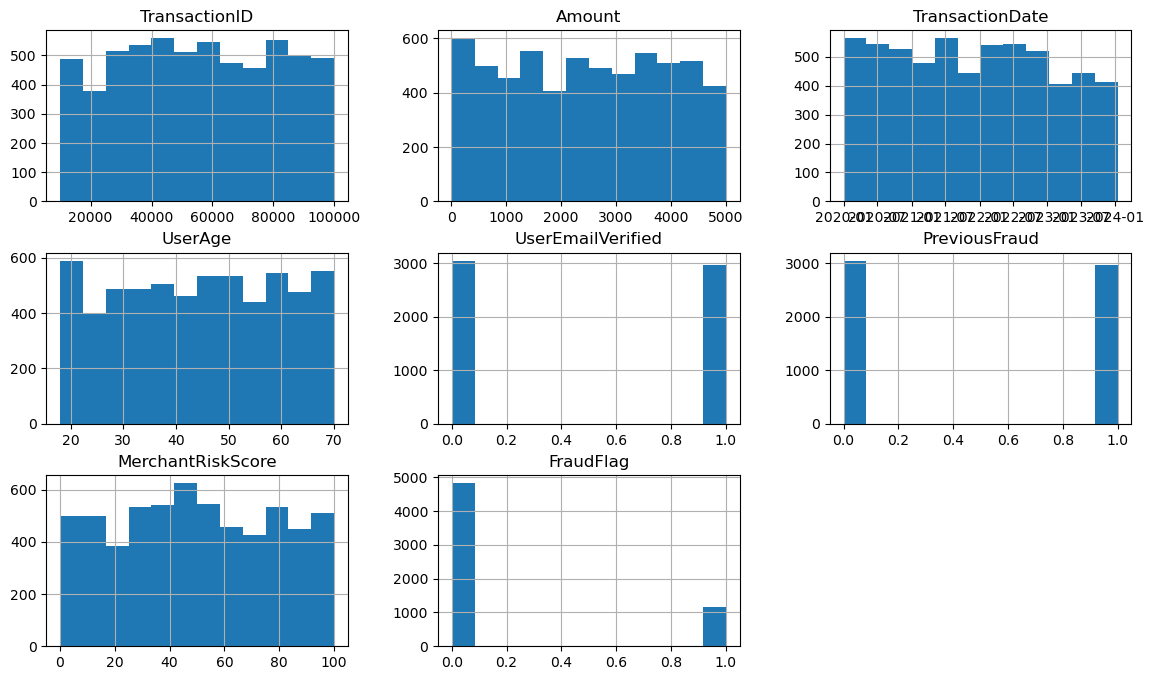

In [43]:
df.hist(bins=12, figsize=(14,8), layout=(3,-1))
plt.show()

In [44]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, linewidth=200, edgeitems=100)

# Pipeline and column transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer

# Data transformers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Data splitter and model evaluator
from sklearn.model_selection import train_test_split, validation_curve, learning_curve, GridSearchCV

# Learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import BaggingClassifier, BaggingRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor  # Need to install

# Performance metrics
from sklearn.metrics import log_loss, roc_auc_score




df = pd.read_csv('finance_fraud_prediction_dataset.csv')      


#####################################################################
# Add your data preprocessing codes below:
#  - Deleting rows and columns that have no valid data
#  - Converting text into numerical or date/time format
#  - Mapping ordinal features into numbers
#  - Other nonlinear transformation such logarithmic transformation 
# Sample codes are in the previous code blocks
#####################################################################



In [45]:

nom_col = ['PaymentType', 'Country']            # nominal features
ord_col = []                        # ordinal features
num_col = ['TransactionID', 'Amount', 'UserAge', 'UserEmailVerified', 'PreviousFraud', 'MerchantRiskScore'] # numerical features


# Define X and y
X = df[nom_col + ord_col + num_col]
y = df['FraudFlag']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    stratify=y,     # for classification tasks only, delete this for regression tasks
                                                    random_state=1
                                                   )

In [75]:


nom_pipe = make_pipeline(SimpleImputer(strategy='most_frequent'),
                         OneHotEncoder(handle_unknown='ignore')
                        )
ord_pipe = make_pipeline(SimpleImputer(strategy='median'),
                         StandardScaler()
                        )
num_pipe = make_pipeline(SimpleImputer(strategy='mean'),
                         StandardScaler()
                        )
# Main pipe 
pipe = make_pipeline(ColumnTransformer( [ ('nom', nom_pipe, nom_col),
                                          #('ord', ord_pipe, ord_col),
                                          ('num', num_pipe, num_col) ], sparse_threshold=0 ),
                     # If using PCA or LDA leads to an error related to sparse input, you can fix it by
                     # adding 'sparse_threshold=0' in the above ColumnTransformer, that is
                     # the last line should read as ... ('num', num_pipe, num_col) ], sparse_threshold=0 ),
                     PCA(n_components=10),  
                     #LDA(n_components=1),
                     
                     ######################################################################
                     # Here you choose a classification model
                     #
                     #SVC(kernel='rbf', C=1, gamma=0.01, probability=True)
                     #SVC(kernel='linear', C=1, gamma=0.01, probability=True)
                     #LogisticRegression(solver='lbfgs', C=0.01)
                     #DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=5, random_state=1)
                     #RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=8, min_samples_leaf=1, random_state=1)
                     #KNeighborsClassifier(n_neighbors=5, p=2)
                     #GradientBoostingClassifier(n_estimators=100, max_depth=3, min_samples_leaf=1, learning_rate=0.1, random_state=1)
                     XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)

                     ######################################################################
                     # Here you choose a regression model
                     #
                     #Ridge(alpha = 0.1)
                     #Lasso(alpha = 0.1)
                     #DecisionTreeRegressor(n_estimators=100, max_depth=8, min_samples_leaf=5, random_state=1)
                     #RandomForestRegressor(n_estimators=100, max_depth=8, min_samples_leaf=5, random_state=1)
                     #GradientBoostingRegressor(n_estimators=100, max_depth=3, min_samples_leaf=1, learning_rate=0.1, random_state=1)
                     #XGBRegressor(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=1)
                    )

######################################################################
# Fit the untuned model, just try to test the codes

pipe.fit(X_train,y_train)


######################################################################
# If your model is a classification problem, the score is the accuracy
# If your model is a regression problem, then score is the R^2


print('Training score:', pipe.score(X_train,y_train))
print('Test score:    ', pipe.score(X_test,y_test))



######################################################################
# For classification problems, check how balanced your target variable is:

print('\ny_train hist: \n', y_train.value_counts())
print('\ny_train dist: \n', y_train.value_counts() / len(y_train))


######################################################################
# If the data is not quite balanced, then it is better to look at other metrics:

print('\nMeasuring performance using log loss (the lower the better):')
print('Training set log loss:', log_loss(y_train, pipe.predict_proba(X_train)))
print('Test set     log loss:', log_loss(y_test,  pipe.predict_proba(X_test)))

print('\nMeasuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):')
print('Training set roc auc:', roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print('Test set     roc auc:', roc_auc_score(y_test,  pipe.predict_proba(X_test) [:,1]))

Training score: 0.8564285714285714
Test score:     0.835

y_train hist: 
 False    3377
True      823
Name: FraudFlag, dtype: int64

y_train dist: 
 False    0.804048
True     0.195952
Name: FraudFlag, dtype: float64

Measuring performance using log loss (the lower the better):
Training set log loss: 0.32059938520237447
Test set     log loss: 0.35918495998303923

Measuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):
Training set roc auc: 0.9602762738862098
Test set     roc auc: 0.9013588728070775


In [76]:
pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(sparse_threshold=0,
                     transformers=[('nom',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('onehotencoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    ['PaymentType', 'Country']),
                                   ('num',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    ['TransactionID', 'Amount', 'UserAge',
                                     'UserEmailVerified', 'Previou

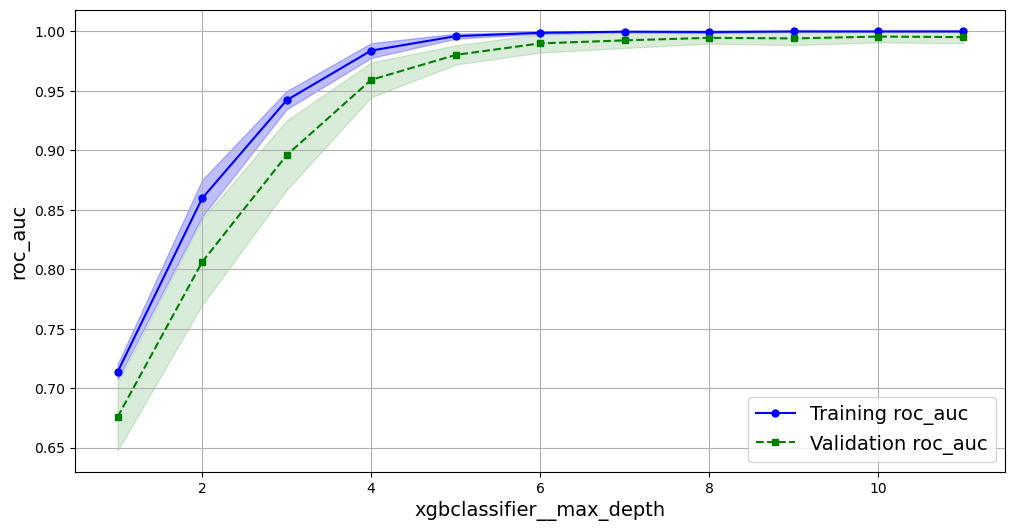

In [77]:
#param_name  = 'svc__C'
#param_range = np.logspace(-5, 1, 5)
#param_name  = 'svc__gamma'
#param_range = np.logspace(-5, 1, 5)

#param_name  = 'logisticregression__C'
#param_range = np.logspace(-4, 2, 5)

#param_name  = 'decisiontreeclassifier__max_depth'
#param_range = np.arange(1,15,3)

#param_name  = 'randomforestclassifier__max_depth'
#param_range = np.arange(1,15,3)
#param_range = np.arange(25,60,20)

#param_name  = 'gradientboostingclassifier__max_depth'
#param_range = np.arange(1,8,1)

param_name  = 'xgbclassifier__max_depth'
param_range = np.arange(1, 12, 1)

#param_name  = 'kneighborsclassifier__n_neighbors'
#param_range = np.arange(1,26,2)

#param_name  = 'ridge__alpha'
#param_range = np.logspace(-4, 8, 5)

#scoring='r2'           # for regression problems
#scoring='accuracy'     # for classification problems with balanced target variable values
#scoring='neg_log_loss' # for classification problems
scoring='roc_auc'      # for binary classification problems


train_scores, val_scores = validation_curve(estimator=pipe, X=X_train, y=y_train, 
                                            cv=10,    # choose 5, if 10 is too slow
                                            param_name=param_name, 
                                            param_range=param_range,
                                            scoring=scoring
                                           )

trn_mean = np.mean(train_scores, axis=1)
trn_std  = np.std (train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std  = np.std (val_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(param_range, trn_mean, 'bo-',  markersize=5, label='Training '+ scoring)
plt.fill_between(param_range, trn_mean+trn_std, trn_mean-trn_std, alpha=0.25, color='blue')

plt.plot(param_range, val_mean, 'gs--', markersize=5, label='Validation '+ scoring)
plt.fill_between(param_range, val_mean+val_std, val_mean-val_std, alpha=0.15, color='green')
plt.grid()

#plt.xscale('log')  # Use this only when param_range = np.logspace(...). Comment this out otherwise.

plt.legend(loc='best', fontsize=14)
plt.xlabel(param_name, fontsize=14)
plt.ylabel(scoring, fontsize=14)
#plt.savefig('val_curve')
plt.show()

In [78]:
# Choose the best hyperparameter and retrain the model

pipe.set_params(xgbclassifier__max_depth = 8)
#pipe.set_params(decisiontreeclassifier__max_depth = 10)
#pipe.set_params(randomforestclassifier__max_depth = 10)
#pipe.set_params(logisticregression__C = 0.1)

pipe.fit(X_train, y_train)   # This is the FINAL model

print('Best Model:')

print('Training score:', pipe.score(X_train,y_train))
print('    Test score:', pipe.score(X_test,y_test))

print('\nMeasuring performance using log loss (the lower the better):')
print('Training set log loss:', log_loss(y_train, pipe.predict_proba(X_train)))
print('    Test set log loss:', log_loss(y_test,  pipe.predict_proba(X_test)))

print('\nMeasuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):')
print('Training set roc auc:', roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]))
print('    Test set roc auc:', roc_auc_score(y_test,  pipe.predict_proba(X_test) [:,1]))

Best Model:
Training score: 0.9976190476190476
    Test score: 0.9888888888888889

Measuring performance using log loss (the lower the better):
Training set log loss: 0.060160414658963594
    Test set log loss: 0.07779435902846873

Measuring performance using roc_auc  (the higher the better: highest possible is 1, random guess is 0.5):
Training set roc auc: 1.0
    Test set roc auc: 1.0


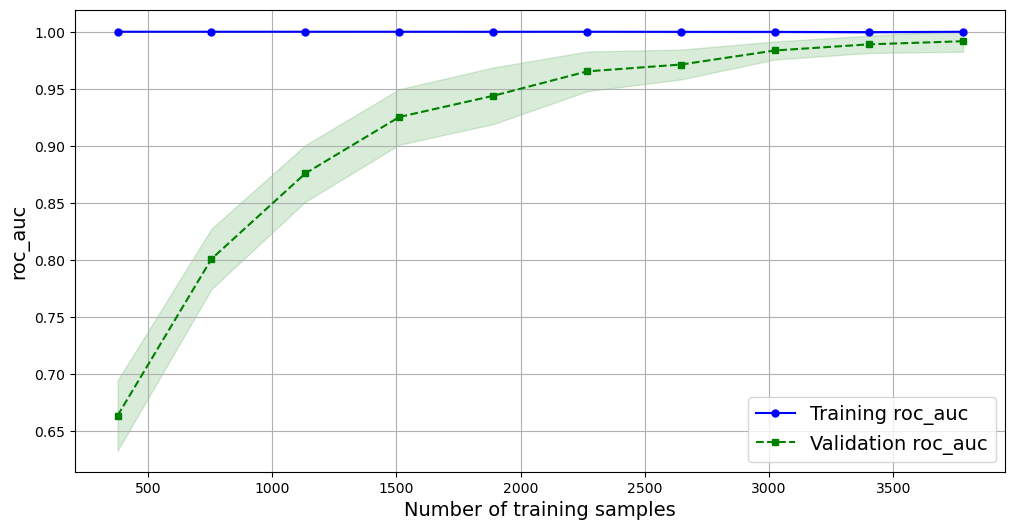

In [59]:
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=X_train, y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=10,
                                                        scoring=scoring
                                                       )
train_mean= np.mean(train_scores, axis=1)
train_std = np.std (train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std  = np.std (test_scores, axis=1)

plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, 'bo-', markersize=5, label='Training '+ scoring)
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.25, color='blue')

plt.plot(train_sizes, test_mean, 'gs--', markersize=5, label='Validation '+ scoring)
plt.fill_between(train_sizes, test_mean + test_std,  test_mean - test_std,   alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples', fontsize=14)
plt.ylabel(scoring, fontsize=14)
plt.legend(loc='best', fontsize=14)
# plt.savefig('learning_curve', dpi=300)
plt.show()

In [60]:
feature_names = X_train.columns
print(feature_names)

Index(['PaymentType', 'Country', 'TransactionID', 'Amount', 'UserAge',
       'UserEmailVerified', 'PreviousFraud', 'MerchantRiskScore'],
      dtype='object')


In [61]:
feature_names = np.concatenate( list(map( lambda col: col + ':' + np.sort(X_train.loc[~X_train[col].isnull(), col].unique()).astype('str').astype('O'),  nom_col )) )
feature_names = np.concatenate( (feature_names, ord_col, num_col) )

original_names= np.concatenate( list(map( lambda col: [col] * X_train[col].nunique(),  nom_col )) )
original_names= np.concatenate( (original_names, ord_col, num_col) )

print(feature_names)
print(original_names)

['PaymentType:Credit Card' 'PaymentType:Debit Card' 'PaymentType:PayPal' 'PaymentType:Wire Transfer' 'Country:Afghanistan' 'Country:Albania' 'Country:Algeria' 'Country:American Samoa'
 'Country:Andorra' 'Country:Angola' 'Country:Anguilla' 'Country:Antarctica (the territory South of 60 deg S)' 'Country:Antigua and Barbuda' 'Country:Argentina' 'Country:Armenia' 'Country:Aruba'
 'Country:Australia' 'Country:Austria' 'Country:Azerbaijan' 'Country:Bahrain' 'Country:Bangladesh' 'Country:Barbados' 'Country:Belarus' 'Country:Belgium' 'Country:Belize' 'Country:Benin'
 'Country:Bermuda' 'Country:Bhutan' 'Country:Bolivia' 'Country:Bosnia and Herzegovina' 'Country:Botswana' 'Country:Bouvet Island (Bouvetoya)' 'Country:Brazil'
 'Country:British Indian Ocean Territory (Chagos Archipelago)' 'Country:British Virgin Islands' 'Country:Brunei Darussalam' 'Country:Bulgaria' 'Country:Burkina Faso' 'Country:Burundi'
 'Country:Cambodia' 'Country:Cameroon' 'Country:Canada' 'Country:Cape Verde' 'Country:Cayman

In [62]:
pca_feature_importances = pipe.named_steps['xgbclassifier'].feature_importances_
print("PCA Feature Importances:", pca_feature_importances)


PCA Feature Importances: [0.09071565 0.09966312 0.09720737 0.10970686 0.10145508 0.09708252 0.09661236 0.11174389 0.08468249 0.11113073]


In [63]:

pca_feature_importances = pipe.named_steps['xgbclassifier'].feature_importances_


num_components = len(pca_feature_importances)
pc_names = ["PC" + str(i+1) for i in range(num_components)]


pca_importances_with_names = np.c_[pc_names, pca_feature_importances]


print("PCA Feature Importances with Names:\n", pca_importances_with_names)






PCA Feature Importances with Names:
 [['PC1' '0.09071565']
 ['PC2' '0.09966312']
 ['PC3' '0.09720737']
 ['PC4' '0.10970686']
 ['PC5' '0.10145508']
 ['PC6' '0.09708252']
 ['PC7' '0.09661236']
 ['PC8' '0.11174389']
 ['PC9' '0.08468249']
 ['PC10' '0.11113073']]


In [64]:
pca_components = pipe.named_steps['pca'].components_
print("PCA Components:\n", pca_components)










PCA Components:
 [[ 0.00400888 -0.02701242  0.01709014  0.0059134   0.00283978  0.00308406 -0.00033187 -0.00259842 -0.00158451  0.00282804 -0.00310598 -0.00157619 -0.00162148  0.00198933 -0.00181234  0.00286123
  -0.00265697 -0.00139849 -0.00071788 -0.00170671 -0.00434399  0.00080093  0.00253285  0.00156587 -0.00301946  0.00249443 -0.00117725 -0.0007242  -0.0009144   0.00180924  0.0009976   0.00299359
  -0.00005525 -0.00460932  0.00104329 -0.0032586  -0.000861   -0.0011341  -0.00070131  0.00041664 -0.00247278 -0.00315922 -0.00075483 -0.00037279 -0.00195624 -0.00108124 -0.00137118  0.00173206
  -0.00255238  0.00045019  0.00181797 -0.00169012  0.00225067  0.0012322   0.00104662  0.00177419  0.00099915 -0.00088727 -0.0000703   0.00068771  0.00019615  0.00295072  0.00247722 -0.00040854
   0.00251496 -0.002755   -0.00065164 -0.00095916 -0.0018739  -0.00025358  0.00457672 -0.0017762  -0.00153039  0.00239453  0.00018278 -0.00017916 -0.00147003  0.00246054 -0.00044668 -0.00016239
   0.00062554

In [65]:
original_feature_importances = np.abs(pca_components.T @ pca_feature_importances)
print("Approximate Original Feature Importances:", original_feature_importances)






Approximate Original Feature Importances: [0.02970688 0.03905544 0.15122179 0.08245946 0.00113427 0.00025227 0.00096818 0.00041767 0.00012761 0.00127896 0.00125994 0.0045602  0.00184096 0.00083356 0.00187183 0.00024516 0.00013836 0.00099202
 0.00056819 0.00021586 0.00411027 0.00058217 0.00081201 0.00123545 0.00111464 0.00666718 0.00035705 0.00018248 0.0008486  0.00130805 0.00022556 0.00091402 0.00048052 0.0022028  0.00151651 0.00197243
 0.00020035 0.00086122 0.00002757 0.00007147 0.00031631 0.00306264 0.00023353 0.00108528 0.00182802 0.00071573 0.00001218 0.00095537 0.00021765 0.00022811 0.00008878 0.00067931 0.0020685  0.00103751
 0.00044449 0.0007594  0.00048633 0.00118133 0.00070204 0.00025248 0.00024795 0.00110493 0.00021781 0.00098814 0.00001045 0.00176144 0.0002031  0.00066959 0.0051421  0.00020698 0.00083881 0.0018457
 0.00126685 0.00312286 0.00044672 0.00027361 0.00165069 0.00012634 0.00036346 0.00133642 0.00028355 0.00005394 0.00042655 0.00040838 0.00067328 0.00225631 0.000750

In [66]:
feature_importance_output = np.c_[feature_names, original_feature_importances]
print(feature_importance_output)



[['PaymentType:Credit Card' 0.02970688400931134]
 ['PaymentType:Debit Card' 0.03905544421064551]
 ['PaymentType:PayPal' 0.15122179221920373]
 ['PaymentType:Wire Transfer' 0.08245946399924686]
 ['Country:Afghanistan' 0.0011342668590071092]
 ['Country:Albania' 0.0002522709457425068]
 ['Country:Algeria' 0.0009681841253362043]
 ['Country:American Samoa' 0.00041766947087682924]
 ['Country:Andorra' 0.00012761150343805762]
 ['Country:Angola' 0.001278959735339067]
 ['Country:Anguilla' 0.001259940375877609]
 ['Country:Antarctica (the territory South of 60 deg S)' 0.004560195927541072]
 ['Country:Antigua and Barbuda' 0.0018409646714144258]
 ['Country:Argentina' 0.000833555217959116]
 ['Country:Armenia' 0.0018718344454100476]
 ['Country:Aruba' 0.00024515569642110204]
 ['Country:Australia' 0.00013836336352607184]
 ['Country:Austria' 0.0009920212304936967]
 ['Country:Azerbaijan' 0.0005681874705630343]
 ['Country:Bahrain' 0.00021585576671894282]
 ['Country:Bangladesh' 0.004110272388128569]
 ['Countr

In [67]:

original_feature_importances = np.abs(pca_components.T @ pca_feature_importances)


sorted_indices = np.argsort(original_feature_importances)[::-1]


sorted_feature_names = feature_names[sorted_indices]
sorted_importances = original_feature_importances[sorted_indices]


sorted_feature_importance_output = np.c_[sorted_feature_names, sorted_importances]


print(sorted_feature_importance_output)


[['PreviousFraud' 0.16216059809046493]
 ['PaymentType:PayPal' 0.15122179221920373]
 ['Amount' 0.11967521831378233]
 ['Country:Sweden' 0.1092065116744223]
 ['PaymentType:Wire Transfer' 0.08245946399924686]
 ['UserAge' 0.0784252559582253]
 ['UserEmailVerified' 0.06893919636695359]
 ['TransactionID' 0.05574933780376508]
 ['MerchantRiskScore' 0.04098995577036542]
 ['PaymentType:Debit Card' 0.03905544421064551]
 ['PaymentType:Credit Card' 0.02970688400931134]
 ['Country:Benin' 0.0066671806115794815]
 ['Country:Eritrea' 0.005142095130763127]
 ['Country:Antarctica (the territory South of 60 deg S)' 0.004560195927541072]
 ['Country:Bangladesh' 0.004110272388128569]
 ['Country:Morocco' 0.0036748547516745698]
 ['Country:Saint Lucia' 0.0032385667829884926]
 ['Country:Fiji' 0.003122858074436183]
 ['Country:Latvia' 0.003114492486189512]
 ['Country:Canada' 0.0030626415698954655]
 ['Country:Japan' 0.0030226048194210453]
 ['Country:Montserrat' 0.0027754589021318134]
 ['Country:Senegal' 0.0027388571754

In [71]:

sorted_indices = np.argsort(original_feature_importances)[::-1]


top_n = 10  
sorted_feature_names_top = feature_names[sorted_indices][:top_n]
sorted_importances_top = original_feature_importances[sorted_indices][:top_n]


sorted_feature_importance_output_top = np.c_[sorted_feature_names_top, sorted_importances_top]


print(sorted_feature_importance_output_top)



[['PreviousFraud' 0.16216059809046493]
 ['PaymentType:PayPal' 0.15122179221920373]
 ['Amount' 0.11967521831378233]
 ['Country:Sweden' 0.1092065116744223]
 ['PaymentType:Wire Transfer' 0.08245946399924686]
 ['UserAge' 0.0784252559582253]
 ['UserEmailVerified' 0.06893919636695359]
 ['TransactionID' 0.05574933780376508]
 ['MerchantRiskScore' 0.04098995577036542]
 ['PaymentType:Debit Card' 0.03905544421064551]]
